In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

accept_df = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', compression='gzip')
reject_df = pd.read_csv('rejected_2007_to_2018Q4.csv.gz', compression='gzip')

In [2]:
# =============================================================================
# Data cleaning
# =============================================================================

accept_df1 = accept_df.dropna(subset=['fico_range_low']) 
accept_df2 = accept_df1.dropna(subset=['dti']) 

reject_df['Risk_Score'] = reject_df['Risk_Score'].where(reject_df['Risk_Score']>0,0)
reject_df['Debt-To-Income Ratio'] = reject_df['Debt-To-Income Ratio'].str.replace('%', '')
reject_df['Debt-To-Income Ratio']= reject_df['Debt-To-Income Ratio'].astype(float)

years = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years',
        '9 years', '10+ years']
years_num = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in range(len(years)):
    accept_df['emp_length'] = accept_df['emp_length'].replace(years[i], years_num[i])
    reject_df['Employment Length'] = reject_df['Employment Length'].replace(years[i], years_num[i])

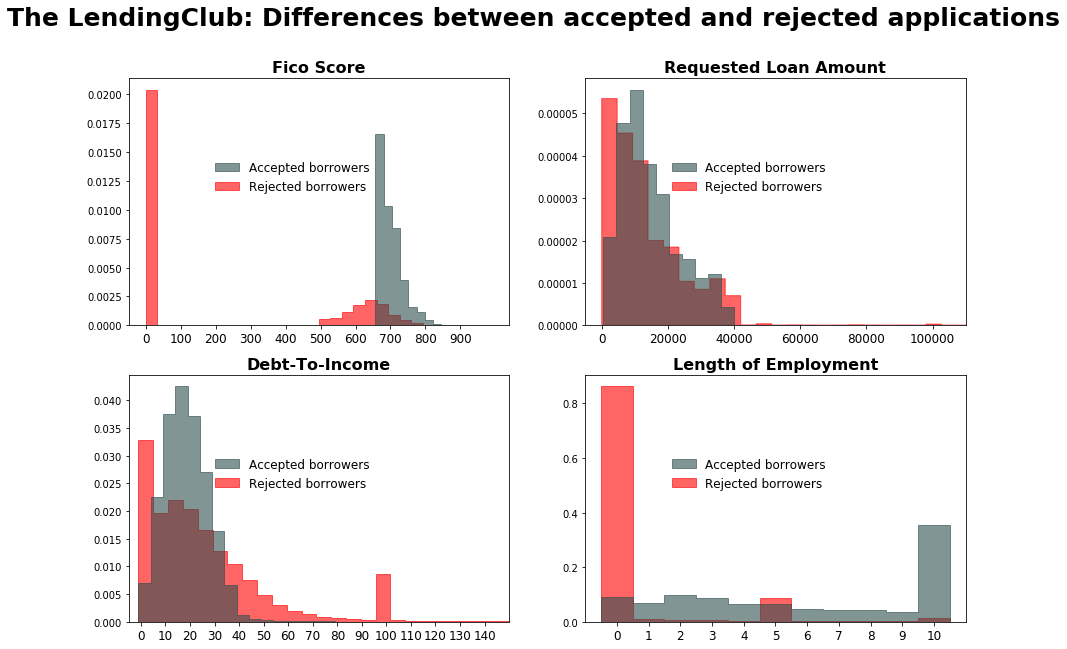

In [3]:
# =============================================================================
# Plotting differences between approved and rejected loan applications
# =============================================================================

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as scs

fig, axs =plt.subplots(2,2, figsize=(15,10))
fig.patch.set_alpha(0.6)
fig.suptitle('The LendingClub: Differences between accepted and rejected applications', fontweight="bold", fontsize=25)


#Subplot 1
axs[0,0].hist(reject_df['Risk_Score'], label = 'Rejected borrowers', bins=30, normed = True, 
            color = 'r', alpha=0.6, edgecolor='r', histtype='stepfilled', align = 'mid')
axs[0,0].hist(accept_df1['fico_range_low'], label = 'Accepted borrowers', bins = 10, normed = True, 
            color = 'darkslategrey', alpha=0.6, edgecolor='darkslategrey', histtype='stepfilled', align = 'mid')

axs[0,0].set_xticks(np.arange(0, 1000, 100))
axs[0,0].xaxis.set_tick_params(labelsize=12)
axs[0,0].patch.set_alpha(0.7)
axs[0,0].set_title('Fico Score', fontweight="bold", fontsize=16)

handles,labels = axs[0,0].get_legend_handles_labels()
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]
axs[0,0].legend(handles,labels, bbox_to_anchor=[0.43, 0.6], loc='center', framealpha=0, fontsize = 'large')


#Subplot 2
axs[0,1].hist(reject_df['Amount Requested'], label = 'Rejected borrowers', 
        bins=300, normed = True, color = 'r', alpha=0.6, histtype='stepfilled', edgecolor='r', align = 'mid')
axs[0,1].hist(accept_df1['loan_amnt'], label = 'Accepted borrowers', 
        bins = 10, normed = True, color = 'darkslategrey', alpha=0.6, histtype='stepfilled', edgecolor='darkslategrey', align = 'mid')
axs[0,1].set_xlim(xmax = 110000, xmin = -5000)
axs[0,1].xaxis.set_tick_params(labelsize=12)
axs[0,1].patch.set_alpha(0.7)
axs[0,1].set_title('Requested Loan Amount', fontweight="bold", fontsize=16)
axs[0,1].legend(handles,labels, bbox_to_anchor=[0.43, 0.6], loc='center', framealpha=0, fontsize = 'large')

#Subplot 3
rejected = reject_df[reject_df['Debt-To-Income Ratio']<150]['Debt-To-Income Ratio']
axs[1,0].hist(rejected, label = 'Rejected borrowers', 
        bins = 25, histtype='stepfilled', normed = True, color = 'r', alpha=0.6, edgecolor='r', align = 'mid')
axs[1,0].hist(accept_df2['dti'], label = 'Accepted borrowers', 
        bins = 200, histtype='stepfilled', normed = True, color = 'darkslategrey', alpha=0.6, edgecolor='darkslategrey', align = 'mid')
axs[1,0].set_xticks(np.arange(-10, 150, 10))
axs[1,0].set_xlim(xmax = 150, xmin = -5)
axs[1,0].xaxis.set_tick_params(labelsize=12)
axs[1,0].patch.set_alpha(0.7)
axs[1,0].set_title('Debt-To-Income', fontweight="bold", fontsize=16)
axs[1,0].legend(handles,labels, bbox_to_anchor=[0.43, 0.6], loc='center', framealpha=0, fontsize = 'large')

#Subplot 4
bins=range(12)
axs[1,1].hist(reject_df['Employment Length'], label = 'Rejected borrowers', 
         bins=bins, normed = True, color = 'r', alpha=0.6, histtype='stepfilled', 
         edgecolor='r', align = 'left')
axs[1,1].hist(accept_df['emp_length'], label = 'Accepted borrowers', 
               bins = bins, normed = True, color = 'darkslategrey', alpha=0.6, histtype='stepfilled', 
               edgecolor='darkslategrey', align = 'left')
axs[1,1].set_xlim(xmax = 11, xmin = -1)
axs[1,1].set_xticks(bins[:-1])
axs[1,1].xaxis.set_tick_params(labelsize=12)
axs[1,1].patch.set_alpha(0.7)
axs[1,1].set_title('Length of Employment', fontweight="bold", fontsize=16)
axs[1,1].legend(handles,labels, bbox_to_anchor=[0.43, 0.6], loc='center', framealpha=0, fontsize = 'large')

In [4]:
# =============================================================================
# Saving the graph as a pickle file
# =============================================================================

import pickle
output = open('Graph.pkl', 'wb')
pickle.dump(fig, output)
output.close()